In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [3]:
df = pd.read_csv('Titanic-Dataset.csv',usecols=['Age','Fare','Survived'])

FileNotFoundError: [Errno 2] No such file or directory: 'Titanic-Dataset.csv'

In [8]:
df = pd.read_csv(r"C:\Users\sumit\Titanic-Dataset.csv",usecols=['Age','Fare','Survived'])
print("Loaded new dataset directly from Users folder.")

Loaded new dataset directly from Users folder.


In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(714, 3)

In [11]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [12]:
x= df.iloc[:,1:]
y=df.iloc[:,0]

In [13]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [14]:
x_train.head(2)

,Age,Fare
328,31.0,20.5250
73,26.0,14.4542


In [15]:
 clf = DecisionTreeClassifier()

In [16]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)

In [17]:
accuracy_score(y_test,y_pred)

0.6293706293706294

In [18]:
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

0.6317097026604068

In [19]:
kbin_age = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')
kbin_fare = KBinsDiscretizer(n_bins=15,encode='ordinal',strategy='quantile')

In [20]:
trf = ColumnTransformer([
    ('first',kbin_age,[0]),
    ('second',kbin_fare,[1])
])

In [22]:
x_train_trf = trf.fit_transform(x_train)
x_test_trf = trf.transform(x_test)

In [23]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [24]:
trf.named_transformers_['first'].bin_edges_

array([array([ 0.42,  6.  , 16.  , 19.  , 21.  , 23.  , 25.  , 28.  , 30.  ,
              32.  , 35.  , 38.  , 42.  , 47.  , 54.  , 80.  ])             ],
      dtype=object)

In [25]:
output = pd.DataFrame({
    'age':x_train['Age'],
    'age_trf':x_train_trf[:,0],
    'fare':x_train['Fare'],
    'fare_trf':x_train_trf[:,1]
}) 

In [27]:
output['age_lables'] = pd.cut(x=x_train['Age'],
                              bins=trf.named_transformers_['first'].bin_edges_[0].tolist())
output['fare_labels'] =pd.cut(x=x_train['Fare'],
                              bins=trf.named_transformers_['second'].bin_edges_[0].tolist())

In [28]:
output.sample(5)

,age,age_trf,fare,fare_trf,age_lables,fare_labels
323,22.0,4.0,29.0000,10.0,"(21.0, 23.0]","(26.55, 31.275]"
25,38.0,11.0,31.3875,11.0,"(35.0, 38.0]","(31.275, 51.479]"
242,29.0,7.0,10.5000,5.0,"(28.0, 30.0]","(8.158, 10.5]"
599,49.0,13.0,56.9292,12.0,"(47.0, 54.0]","(51.479, 76.292]"
243,22.0,4.0,7.1250,0.0,"(21.0, 23.0]","(0.0, 7.25]"


In [30]:
clf = DecisionTreeClassifier()
clf.fit(x_train_trf,y_train)
y_pred2 = clf.predict(x_test_trf)

In [31]:
accuracy_score(y_test,y_pred2)

0.6363636363636364

In [32]:
x_trf = trf.fit_transform(x)
np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy'))

0.6317097026604068

In [43]:
def discretize(bins,strategy):
    kbin_age = KBinsDiscretizer(n_bins=bins,encode='ordinal')
    kbin_fare = KBinsDiscretizer(n_bins=bins,encode='ordinal')
    
    trf = ColumnTransformer([
        ('first',kbin_age,[0]),
        ('second',kbin_fare,[1])
    ])
    
    x_trf = trf.fit_transform(x)
    print(np.mean(cross_val_score(DecisionTreeClassifier(),x,y,cv=10,scoring='accuracy')))
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Age'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(x_trf[:,0],color='red')
    plt.title("After")

    plt.show()
    
    plt.figure(figsize=(14,4))
    plt.subplot(121)
    plt.hist(x['Fare'])
    plt.title("Before")

    plt.subplot(122)
    plt.hist(x_trf[:,1],color='red')
    plt.title("Fare")

    plt.show()
    

C:\Users\sumit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
C:\Users\sumit\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


0.6303012519561816


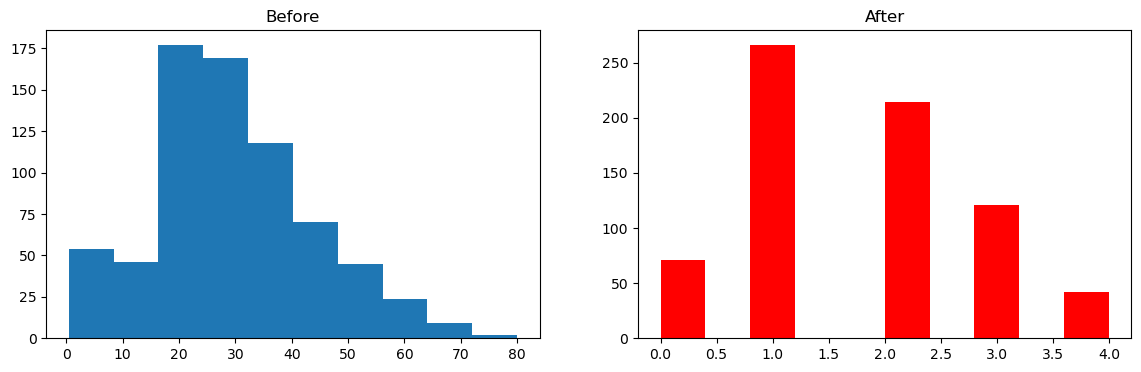

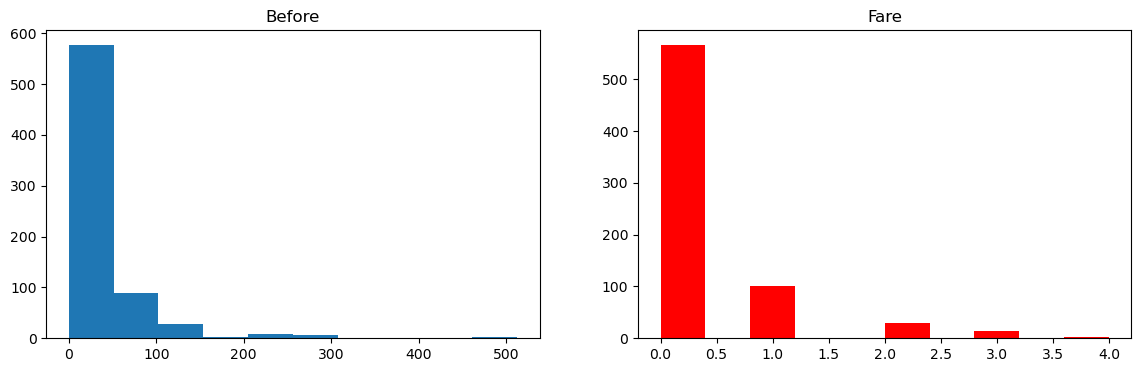

In [40]:
discretize(5,'kmeans')

0.6373043818466353


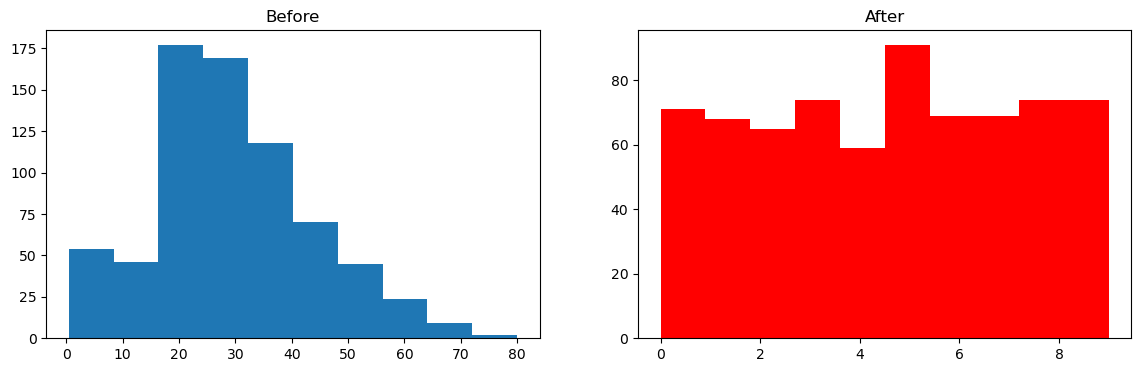

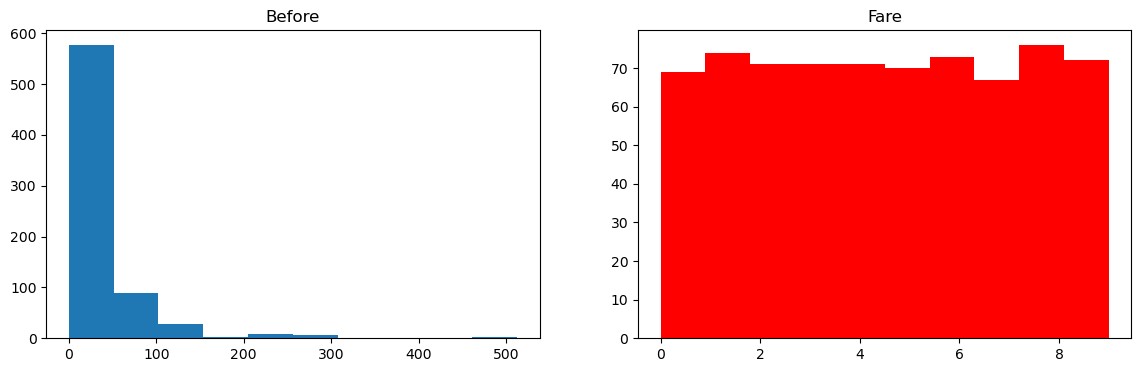

In [44]:
discretize(10,'quartile')

0.6303403755868544


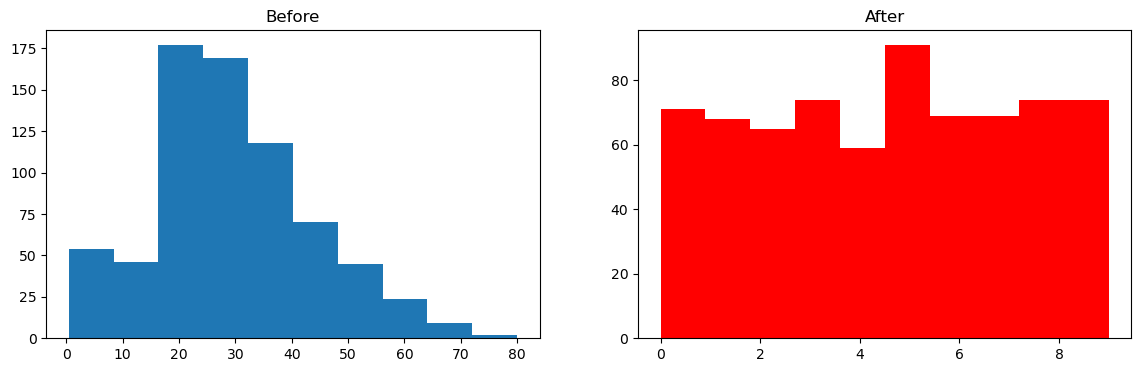

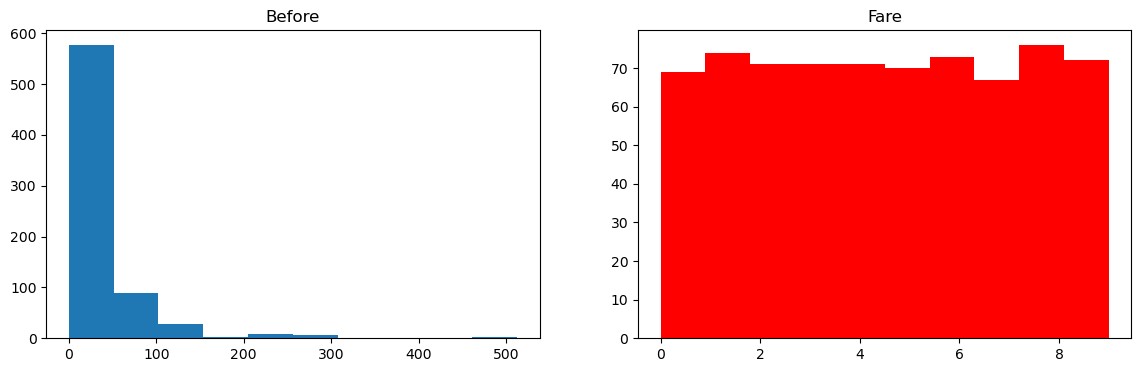

In [45]:
discretize(10,'uniform')